PROBLEM STATEMENT

Target Varriable: Discount_pct

problemstatement: The goal is to analyze customer shopping behavior using transaction and demographic data to understand purchasing patterns, improve sales, optimize marketing strategies, and enhance customer experience.

#1.Understanding Data

The Online Shopping Dataset contains information about customers and their transactions on an e-commerce platform. this dataset include 52599 rows and 21 columns.

CustomerID: Unique identifier for each customer (numeric).

Gender: Gender of the customer (categorical, e.g., Male, Female).

Location: Customer's location or address (text).

Tenure_Months: Duration (in months) the customer has been with the platform (numeric).

Transaction_ID: Unique identifier for each transaction (numeric).

Transaction_Date: Date of the transaction (date).

Product_SKU: Unique identifier for the product (text).

Product_Description: Description of the product (text).

Product_Category: Category of the product (categorical).

Quantity: Quantity of the product purchased (numeric).

Avg_Price: Average price of the product (numeric).

Delivery_Charges: Charges for product delivery (numeric).

Coupon_Status: Status of any applied coupon (categorical).

GST: Goods and Services Tax for the transaction (numeric).

Date: Date of the transaction (date, may duplicate Transaction_Date).

Offline_Spend: Amount spent offline by the customer (numeric).

Online_Spend: Amount spent online by the customer (numeric).

Month: Month of the transaction (categorical).

Coupon_Code: Coupon code used (if any, text).

Discount_pct: Discount percentage applied to the transaction (numeric).

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

In [40]:
df=pd.read_csv('/content/file.csv')

In [41]:
df

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52950,52950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gift Cards,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,GC20,20.0
52951,52951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks & Journals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NJ20,20.0
52952,52952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,AND10,10.0
52953,52953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,AND20,20.0


In [42]:
df.shape

(52955, 21)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [44]:
df.columns

Index(['Unnamed: 0', 'CustomerID', 'Gender', 'Location', 'Tenure_Months',
       'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Date', 'Offline_Spend',
       'Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')

In [45]:
df.isnull().sum()

,0
Unnamed: 0,0
CustomerID,31
Gender,31
Location,31
Tenure_Months,31
Transaction_ID,31
Transaction_Date,31
Product_SKU,31
Product_Description,31
Product_Category,0


In [46]:
df.tail()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
52950,52950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gift Cards,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,GC20,20.0
52951,52951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks & Journals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NJ20,20.0
52952,52952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,AND10,10.0
52953,52953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,AND20,20.0
52954,52954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,AND30,30.0


In [47]:
df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


#2.Data Cleaning

In [48]:
df.isnull().sum()

,0
Unnamed: 0,0
CustomerID,31
Gender,31
Location,31
Tenure_Months,31
Transaction_ID,31
Transaction_Date,31
Product_SKU,31
Product_Description,31
Product_Category,0


In [49]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
52950,False
52951,False
52952,False
52953,False


In [50]:
df.drop_duplicates(inplace=True)

In [51]:
#The unnamed columns same to index columns
df.dropna(inplace=True)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [52]:
df.drop(columns=['Product_SKU'],inplace=True)

In [53]:
df.drop(columns=['Product_Description'],inplace=True)
df

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,Nest-USA,1.0,153.71,6.5,Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,Nest-USA,1.0,153.71,6.5,Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,Nest-USA,2.0,122.77,6.5,Not Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,Nest-USA,1.0,81.50,6.5,Clicked,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,Nest-USA,1.0,153.71,6.5,Clicked,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,22504.0,2019-03-10,Gift Cards,1.0,250.00,0.0,Clicked,0.05,3/10/2019,2500.0,1294.22,3,GC30,30.0
52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,Gift Cards,1.0,25.00,0.0,Used,0.05,3/28/2019,2000.0,1066.12,3,GC30,30.0
52921,16085.0,M,California,15.0,39991.0,2019-10-06,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0
52922,16085.0,M,California,15.0,39991.0,2019-10-06,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0


In [54]:
#The categorical columns fill using mode
categorical_columns = ['Gender', 'Location', 'Coupon_Status', 'Transaction_ID', 'Transaction_Date', 'Date']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-54-e87fbd93c7fa>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [55]:
#fill numerical column using mean
numerical_columns = ['Tenure_Months', 'Quantity', 'Avg_Price', 'Delivery_Charges', 'GST', 'Offline_Spend', 'Online_Spend']
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-55-dff318637cf1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [56]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Location,0
Tenure_Months,0
Transaction_ID,0
Transaction_Date,0
Product_Category,0
Quantity,0
Avg_Price,0
Delivery_Charges,0


#3.Descriptive Statistics

In [57]:
df.describe()

,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
count,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000,52524.000000
mean,15345.347213,26.140393,32445.093367,4.500171,52.429089,10.476922,0.137433,2832.428985,1894.216417,6.665810,19.953164
std,1766.862675,13.473500,8654.724704,20.159985,64.156649,19.343153,0.045865,935.612254,807.160639,3.335292,8.127280
min,12346.000000,2.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000,10.000000
25%,13869.000000,15.000000,25404.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000,10.000000
50%,15311.000000,27.000000,32678.000000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000,20.000000
75%,16996.000000,37.000000,39174.250000,2.000000,119.000000,6.500000,0.180000,3500.000000,2425.350000,9.000000,30.000000
max,18283.000000,50.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000,30.000000


In [58]:
# unique values count in each features
df.nunique()


,0
CustomerID,1468
Gender,2
Location,5
Tenure_Months,49
Transaction_ID,25000
Transaction_Date,365
Product_Category,16
Quantity,151
Avg_Price,542
Delivery_Charges,267


#4.Data Vizualisation

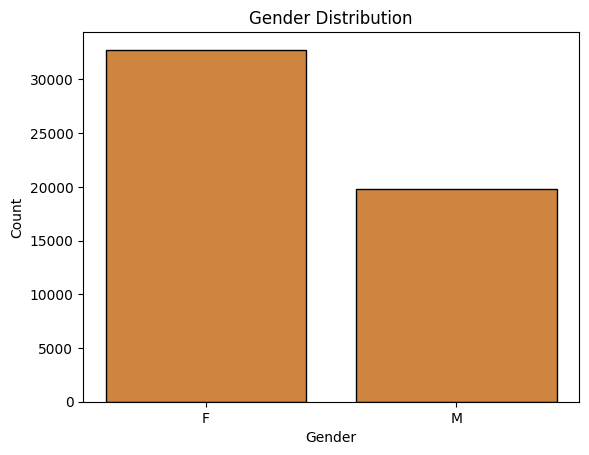

In [59]:
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color='peru', edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Tenure Months Frequency of Customers')

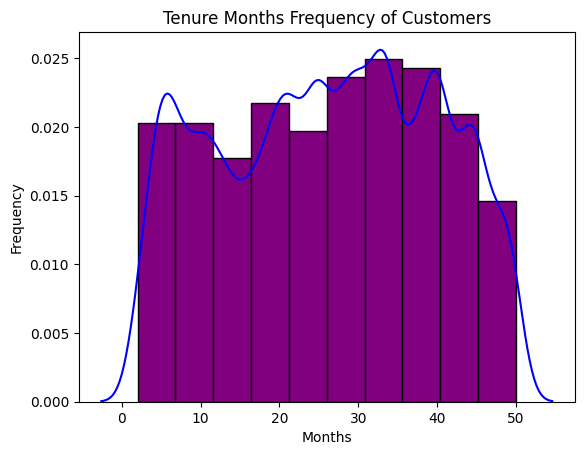

In [60]:
plt.hist(df['Tenure_Months'], density=True, color='purple', edgecolor='black')
sns.kdeplot(df['Tenure_Months'], color='blue')

plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Tenure Months Frequency of Customers')

Text(0.5, 1.0, 'Location Frequencies')

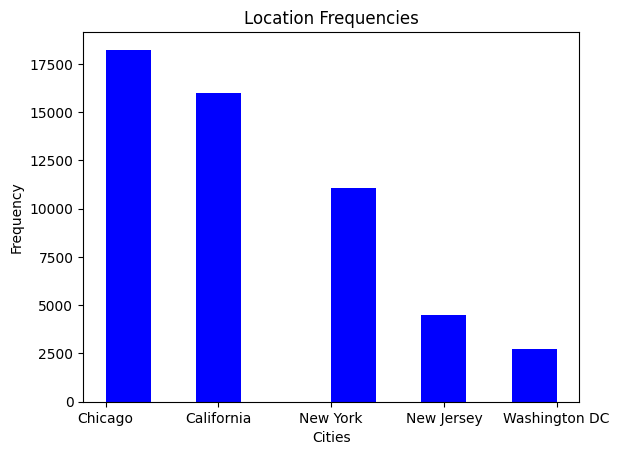

In [61]:
plt.hist(df.Location, color='blue')
plt.ylabel('Frequency')
plt.xlabel('Cities')
plt.title('Location Frequencies')

Text(0.5, 1.0, 'Delivery Charges Vs Avg_Price')

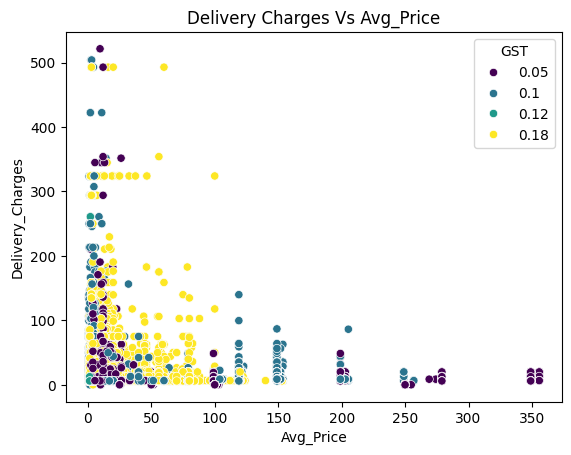

In [62]:
sns.scatterplot(data=df,y='Delivery_Charges',x='Avg_Price',hue='GST',palette='viridis')
plt.title('Delivery Charges Vs Avg_Price')

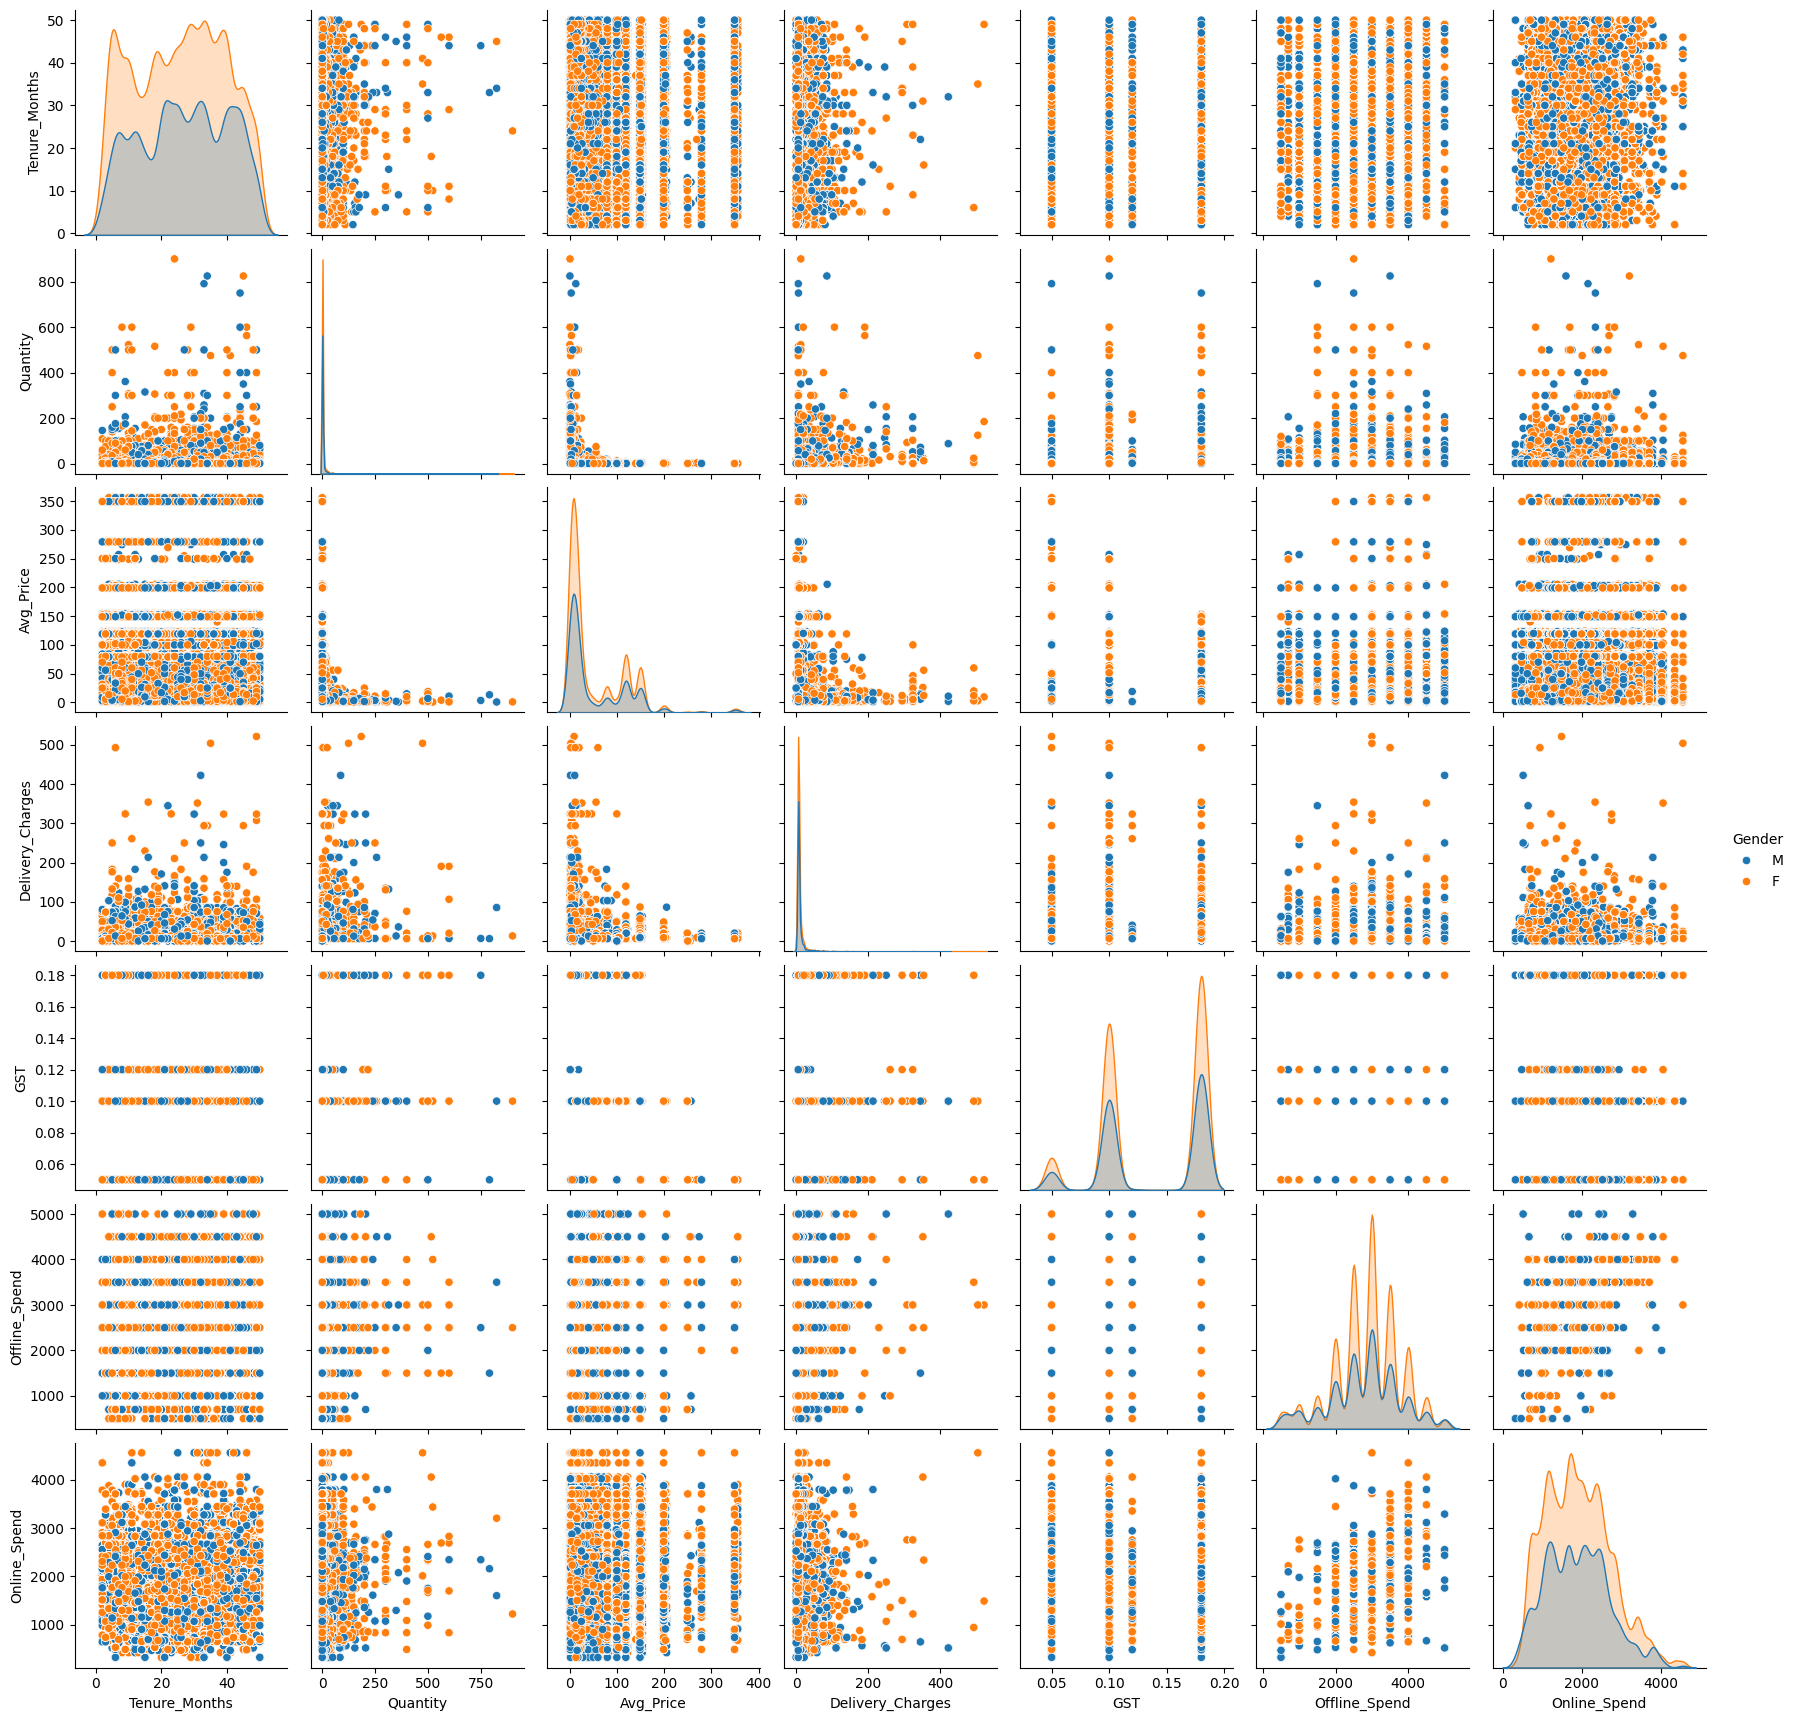

In [ ]:
#Specified vars= to select only the numerical columns for plotting.
sns.pairplot(data=df,
             vars=['Tenure_Months', 'Quantity', 'Avg_Price', 'Delivery_Charges', 'GST', 'Offline_Spend', 'Online_Spend'],
             hue='Gender')
plt.show()

#5.Correlation Analyisis

In [63]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Location'] = labelencoder.fit_transform(df['Location'])
df['Product_Category'] = labelencoder.fit_transform(df['Product_Category'])
df['Coupon_Status'] = labelencoder.fit_transform(df['Coupon_Status'])
df['Coupon_Code'] = labelencoder.fit_transform(df['Coupon_Code'])
df

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,1,1,12.0,16679.0,2019-01-01,12,1.0,153.71,6.5,2,0.10,1/1/2019,4500.0,2424.50,1,12,10.0
1,17850.0,1,1,12.0,16680.0,2019-01-01,12,1.0,153.71,6.5,2,0.10,1/1/2019,4500.0,2424.50,1,12,10.0
2,17850.0,1,1,12.0,16696.0,2019-01-01,12,2.0,122.77,6.5,1,0.10,1/1/2019,4500.0,2424.50,1,12,10.0
3,17850.0,1,1,12.0,16699.0,2019-01-01,12,1.0,81.50,6.5,0,0.10,1/1/2019,4500.0,2424.50,1,12,10.0
4,17850.0,1,1,12.0,16700.0,2019-01-01,12,1.0,153.71,6.5,0,0.10,1/1/2019,4500.0,2424.50,1,12,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,0,0,8.0,22504.0,2019-03-10,6,1.0,250.00,0.0,0,0.05,3/10/2019,2500.0,1294.22,3,20,30.0
52920,18077.0,1,1,34.0,24250.0,2019-03-28,6,1.0,25.00,0.0,2,0.05,3/28/2019,2000.0,1066.12,3,20,30.0
52921,16085.0,1,0,15.0,39991.0,2019-10-06,13,1.0,10.80,6.0,0,0.05,10/6/2019,3000.0,2230.76,10,33,10.0
52922,16085.0,1,0,15.0,39991.0,2019-10-06,13,1.0,9.60,6.0,2,0.05,10/6/2019,3000.0,2230.76,10,33,10.0


In [64]:
df['Date'] = pd.to_datetime(df['Date'])


In [65]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

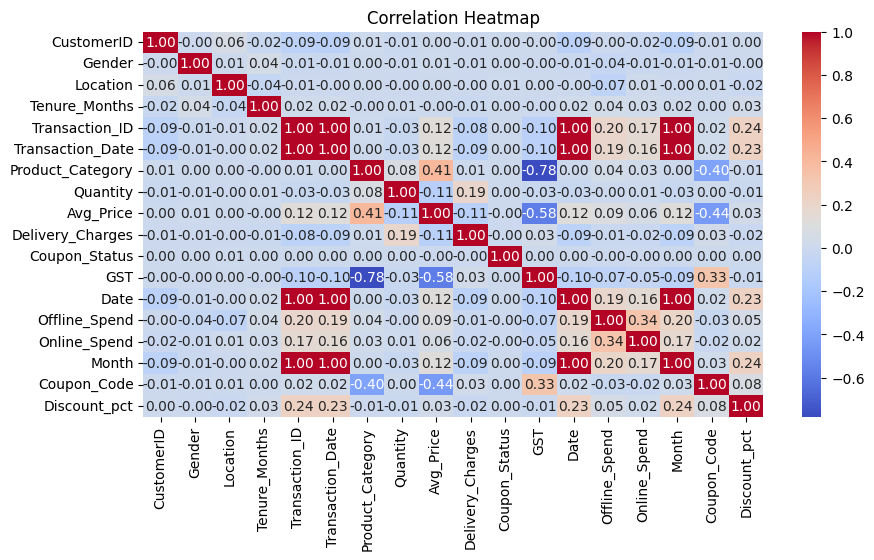

In [66]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#6.outlier detection

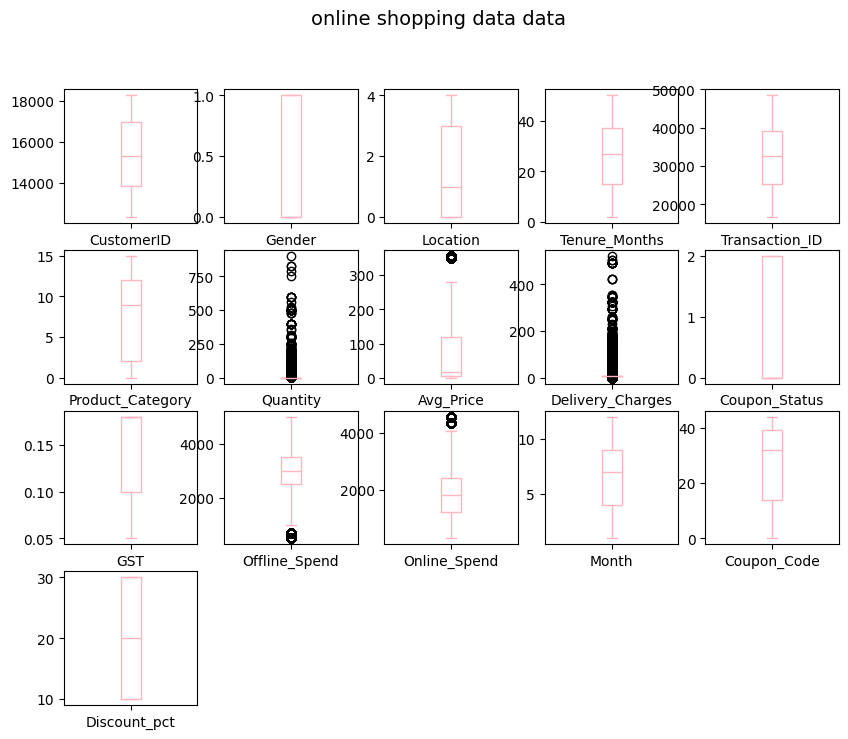

In [29]:
df.plot(kind='box', subplots=True, layout=(4,5), figsize=(10,8),
color='lightpink')
plt.suptitle('online shopping data data', fontsize=14)
plt.show()

In [30]:
#removes outliers from the dataset
numerical_cols = ['Avg_Price', 'Quantity', 'Delivery_Charges', 'GST', 'Offline_Spend', 'Online_Spend']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

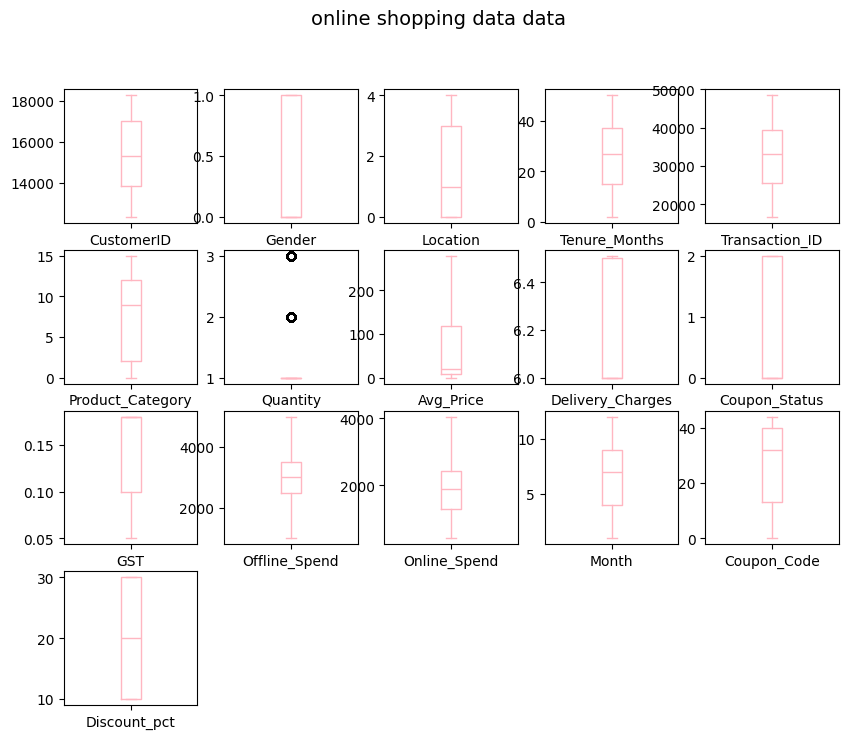

In [31]:
df.plot(kind='box', subplots=True, layout=(4,5), figsize=(10,8),
color='lightpink')
plt.suptitle('online shopping data data', fontsize=14)
plt.show()

#7.Feature Engineering

In [67]:
df['Total_Spend'] = df['Online_Spend'] + df['Offline_Spend']

In [68]:
df['Discount_Amount'] = (df['Discount_pct'] / 100) * df['Avg_Price'] * df['Quantity']


In [69]:
print(df[['CustomerID', 'Total_Spend', 'Discount_Amount']].head())


   CustomerID  Total_Spend  Discount_Amount
0     17850.0       6924.5           15.371
1     17850.0       6924.5           15.371
2     17850.0       6924.5           24.554
3     17850.0       6924.5            8.150
4     17850.0       6924.5           15.371


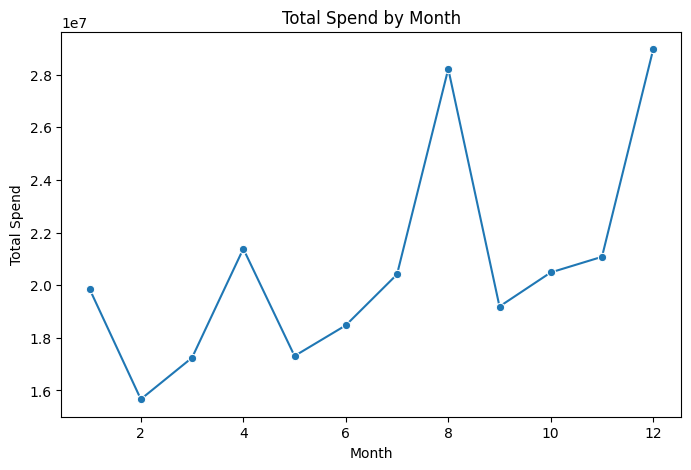

In [70]:
monthly_sales = df.groupby('Month')['Total_Spend'].sum()

plt.figure(figsize=(8, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Total Spend by Month')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.show()


#8.Data Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
num_cols = ['Avg_Price', 'Quantity', 'Delivery_Charges', 'GST', 'Offline_Spend', 'Online_Spend']

# Apply Standard Scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print(df.head())  # Check transformed values


   CustomerID  Gender  Location  Tenure_Months  Transaction_ID  \
0     17850.0       1         1           12.0         16679.0   
1     17850.0       1         1           12.0         16680.0   
2     17850.0       1         1           12.0         16696.0   
3     17850.0       1         1           12.0         16699.0   
4     17850.0       1         1           12.0         16700.0   

  Transaction_Date  Product_Category  Quantity  Avg_Price  Delivery_Charges  \
0       2019-01-01                12 -0.463855   1.662828          1.332453   
1       2019-01-01                12 -0.463855   1.662828          1.332453   
2       2019-01-01                12  1.451595   1.133880          1.332453   
3       2019-01-01                12 -0.463855   0.428332          1.332453   
4       2019-01-01                12 -0.463855   1.662828          1.332453   

   Coupon_Status       GST       Date  Offline_Spend  Online_Spend  Month  \
0              2 -0.846636 2019-01-01       1.88531

In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

# Define features and target variable
# Exclude date or object type columns from features
#X = df[['Avg_Price', 'Quantity', 'Delivery_Charges', 'GST', 'Offline_Spend', 'Online_Spend']]  # Features
#y = df['Discount_pct']  # Target variable

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now apply scaling only to numerical features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

#9.initial modeling and hypothesis testing

In [71]:
# Select independent variables (features)
features = ['Avg_Price','Quantity','Delivery_Charges','GST','Total_Spend']
target = 'Discount_pct'

# Drop missing values (if any)
df = df.dropna(subset=[target])

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Standardize the features for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [72]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor


def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Dictionary to store results
results = {}
# List of regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}


# Iterate through each model
for name, model in models.items():
    print(f"Training {name}")

    # Fit the model
    model.fit(X_train, y_train)

    # Predict the test set
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    mae, rmse, r2 = evaluate_model(y_test, y_pred)

    # Store the results
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

# Display the results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

Training Linear Regression
Training Ridge Regression
Training Lasso Regression
Training ElasticNet Regression
Training Decision Tree
Training Random Forest
Training Gradient Boosting
Training K-Nearest Neighbors

Model: Linear Regression
MAE: 6.6952
RMSE: 8.1159
R²: 0.0038

Model: Ridge Regression
MAE: 6.6952
RMSE: 8.1159
R²: 0.0038

Model: Lasso Regression
MAE: 6.6934
RMSE: 8.1167
R²: 0.0036

Model: ElasticNet Regression
MAE: 6.6943
RMSE: 8.1163
R²: 0.0037

Model: Decision Tree
MAE: 0.0495
RMSE: 0.8393
R²: 0.9893

Model: Random Forest
MAE: 0.1177
RMSE: 0.6989
R²: 0.9926

Model: Gradient Boosting
MAE: 5.2161
RMSE: 6.3614
R²: 0.3879

Model: K-Nearest Neighbors
MAE: 1.0698
RMSE: 3.0489
R²: 0.8594


#10.documentation and summary

In [73]:
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum().sum(),
    'Correlation with price': df.corr()['Discount_pct'].sort_values(ascending=False)
}
print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")
# Prepare final dataset for modeling

final_df = df[['Avg_Price','Quantity','Delivery_Charges','GST','Total_Spend']]

EDA Summary:
Dataset Shape: (52524, 20)
Missing Values: 0
Correlation with price: Discount_pct        1.000000
Transaction_ID      0.241759
Month               0.236194
Transaction_Date    0.230874
Date                0.230874
Discount_Amount     0.227142
Coupon_Code         0.076708
Offline_Spend       0.051719
Total_Spend         0.047696
Tenure_Months       0.029703
Avg_Price           0.027688
Online_Spend        0.024343
Coupon_Status       0.003059
CustomerID          0.000337
Gender             -0.004762
Product_Category   -0.007492
Quantity           -0.011381
GST                -0.012852
Delivery_Charges   -0.018870
Location           -0.021810
Name: Discount_pct, dtype: float64
